<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/Hierarchical_Clustering/Income_dataset_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

print("Shape:", df.shape)
df.head()

Shape: (22, 3)


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [4]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [5]:
# Dataset Scaling
scaler_age = MinMaxScaler()
scaler_age.fit(df[['Age']])
df['Age'] = scaler_age.transform(df[['Age']])

In [6]:
scaler_income = MinMaxScaler()
scaler_income.fit(df[['Income($)']])
df['Income($)'] = scaler_income.transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [7]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

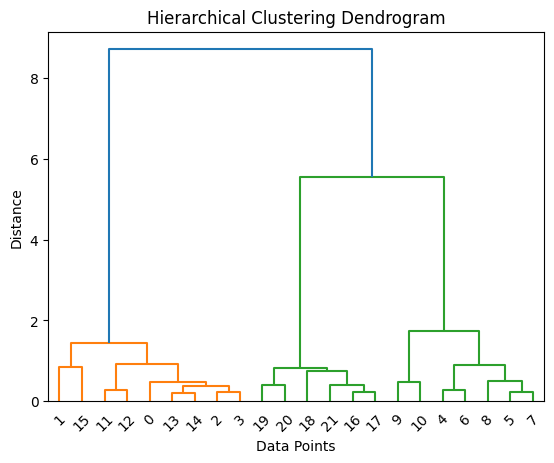

In [8]:
linkage_matrix = linkage(pairwise_distances(df[['Age', 'Income($)']]), method='ward')
dendrogram(linkage_matrix, labels=df.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

**Comment:** Here we find the 3 vertical line. That's why the clusters value are 3

In [9]:
model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = model.fit_predict(df[['Age', 'Income($)']])

In [10]:
df['cluster'] = clusters
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [11]:
df['cluster'].unique()

array([1, 0, 2])

In [12]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

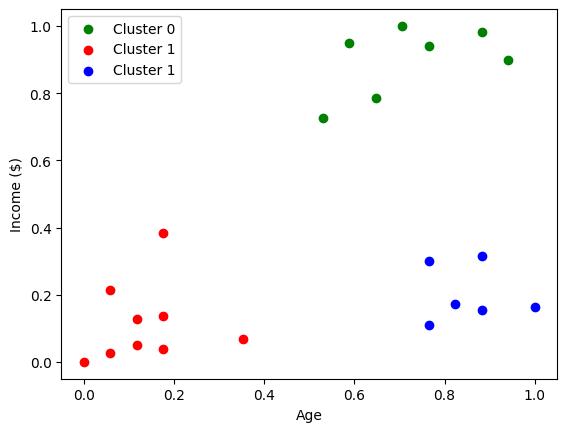

In [13]:
# Scatter Plot

plt.scatter(df0['Age'], df0['Income($)'], color="green", label="Cluster 0")
plt.scatter(df1['Age'], df1['Income($)'], color="red", label="Cluster 1")
plt.scatter(df2['Age'], df2['Income($)'], color="blue", label="Cluster 1")

plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()
plt.show()